### 1. Re-code the titanic machine learning

<p>1. Random Choose Method to get optimal k and b

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 

path = '/Users/tracy/Documents/PythonProjects/Competition/Titannic/titanic/train.csv'

In [2]:
content = pd.read_csv(path)
content.dropna(how='any',inplace=True)

In [3]:
age_with_fares = content[
 	(content['Age']>22) & (content['Fare']< 400)&(content['Fare']>130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

def func(age,k,b):
	return k * age + b

def loss(y,yhat):
	"""
	:param y: the real fares
	:param yhat: the estimated fares
	:return : the distance between real fare and estimated fare
	"""
	return np.mean(np.abs(y-yhat))

f(age) = None * age + None,with error rate:145.8596421052632
f(age) = None * age + None,with error rate:114.03728421052631
f(age) = None * age + None,with error rate:66.9991263157895
f(age) = None * age + None,with error rate:61.3149157894737
f(age) = None * age + None,with error rate:61.26228421052633
f(age) = None * age + None,with error rate:61.20965263157896


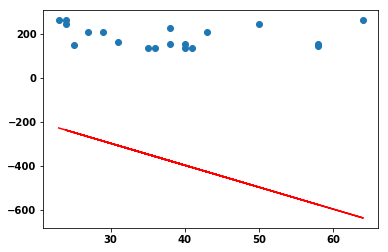

In [4]:
min_error_rate = float('inf')
best_k,best_b = None,None

losses = []
loop_times = 1000
while loop_times>0:
	k_hat = random.randint(-10,10)
	b_hat = random.randint(-10,10)
	estimated_fares = func(sub_age,k_hat,b_hat)
	error_rate = loss(y=sub_fare,yhat=estimated_fares)
	if error_rate < min_error_rate:
		min_error_rate = error_rate
		losses.append(min_error_rate)
		print("f(age) = {} * age + {},with error rate:{}".format(best_k,best_b,min_error_rate))
	loop_times -=1

plt.scatter(sub_age,sub_fare)
plt.plot(sub_age,estimated_fares,c='r')
plt.show()

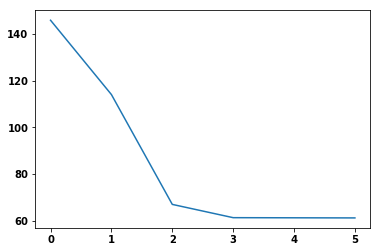

In [5]:
plt.plot(range(len(losses)),losses)
plt.show()

<p>2.Supervised Direction to get optimal k and b


In [40]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 

path = '/Users/tracy/Documents/PythonProjects/Competition/Titannic/titanic/train.csv'

content = pd.read_csv(path)
content.dropna(how='any',inplace=True)

age_with_fares = content[
 	(content['Age']>22) & (content['Fare']< 400)&(content['Fare']>130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

def func(age,k,b):
	return k * age + b

def loss(y,yhat):
	"""
	:param y: the real fares
	:param yhat: the estimated fares
	:return : the distance between real fare and estimated fare
	"""
	return np.mean(np.abs(y-yhat))

min_error_rate = float('inf')

losses = []
loop_times = 10000

change_directions = [
    (+1,-1),
    (+1,+1),
    (-1,+1),
    (-1,-1)   ]

best_k = random.random() * 20 -10
best_b = random.random() * 20 -10

def step(): return random.random() * 1 

while loop_times > 0:

	k_delta_direction, b_delta_direction = random.choice(change_directions )

	k_delta = k_delta_direction * step()
	b_delta = b_delta_direction * step()

	new_k = best_k + k_delta
	new_b = best_b + b_delta 

	estimated_fares = func(sub_age,new_k,new_b)
	error_rate = loss(y=sub_fare,yhat=estimated_fares)
	if error_rate < min_error_rate :
		min_error_rate = error_rate
		best_k,best_b = new_k,new_b
        
		direction = (k_delta_direction,b_delta_direction)
		#print('loop == {}'.format(loop_times))
		losses.append(min_error_rate)
		#print("f(age) = {} * age + {},with error rate:{}".format(best_k,best_b,min_error_rate))
	else:
		direction = direction = random.choice(list(set(change_directions) - {(k_delta_direction,b_delta_direction)}))
	loop_times -= 1

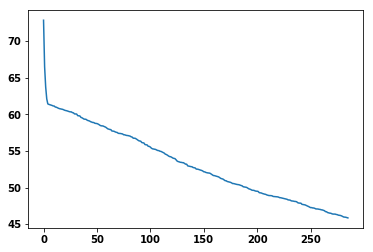

In [7]:
plt.plot(range(len(losses)),losses)
plt.show()

<p>3.Gradient Descent to get optimal k and b

In [41]:
def func(age,k,b):
	return k * age + b

def loss(y,yhat):
	"""
	:param y: the real fares
	:param yhat: the estimated fares
	:return : the distance between real fare and estimated fare
	"""
	return np.mean(np.abs(y-yhat))

losses = []
loop_times = 10000

k_hat = random.random() * 20 -10
b_hat = random.random() * 20 -10

def derivate_k(y,yhat,x):
	 abs_values = [1 if (y_i - yhat_i) >0 else -1 for y_i,yhat_i in zip(y,yhat)]
	 return np.mean([a * -x_i for a, x_i in zip(abs_values,x)])

def derivate_b(y,yhat):
	abs_values = [1 if (y_i - yhat_i) >0 else -1 for y_i,yhat_i in zip(y,yhat)]
	return np.mean([a * -1 for a in abs_values])

learning_rate  = 1e-1

while loop_times > 0:
	k_delta = -1 * learning_rate * derivate_k(sub_fare,func(sub_age,k_hat,b_hat),sub_age)
	b_delta = -1 * learning_rate * derivate_b(sub_fare,func(sub_age,k_hat,b_hat))

	k_hat += k_delta 
	b_hat += b_delta 

	estimated_fares = func(sub_age,k_hat,b_hat)
	error_rate = loss(y=sub_fare,yhat=estimated_fares)

# 	print('loop == {}'.format(loop_times))
# 	print("f(age) = {} * age + {},with error rate:{}".format(k_hat,b_hat,error_rate))
	losses.append(error_rate)
	loop_times -= 1